In [67]:
import pandas as pd
data = pd.read_csv("songs.csv", encoding='latin-1',engine='python')
# Preview the first & last 5 lines of the loaded data
data

,id,title,artist,top genre,year,energy,danceability,liveness,acousticness,speechiness,pop
0,1,"Hey, Soul Sister",Train,neo mellow,2010,89,67,8,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,93,75,52,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,84,76,29,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,92,70,8,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,84,64,9,2,4,78
...,...,...,...,...,...,...,...,...,...,...,...
598,599,Find U Again (feat. Camila Cabello),Mark Ronson,dance pop,2019,66,61,20,1,3,75
599,600,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,pop,2019,79,75,7,21,12,75
600,601,"No Brainer (feat. Justin Bieber, Chance the Ra...",DJ Khaled,dance pop,2019,76,53,9,7,34,70
601,602,Nothing Breaks Like a Heart (feat. Miley Cyrus),Mark Ronson,dance pop,2019,79,60,42,1,7,69


In [68]:
data.describe()

,id,year,energy,danceability,liveness,acousticness,speechiness,pop
count,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000
mean,302.000000,2014.592040,70.504146,64.379768,17.774461,14.326700,8.358209,66.520730
std,174.215384,2.607057,16.310664,13.378718,13.102543,20.766165,7.483162,14.517746
min,1.000000,2010.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,151.500000,2013.000000,61.000000,57.000000,9.000000,2.000000,4.000000,60.000000
50%,302.000000,2015.000000,74.000000,66.000000,12.000000,6.000000,5.000000,69.000000
75%,452.500000,2017.000000,82.000000,73.000000,24.000000,17.000000,9.000000,76.000000
max,603.000000,2019.000000,98.000000,97.000000,74.000000,99.000000,48.000000,99.000000


array([[<Axes: title={'center': 'id'}>, <Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'energy'}>],
       [<Axes: title={'center': 'danceability'}>,
        <Axes: title={'center': 'liveness'}>,
        <Axes: title={'center': 'acousticness'}>],
       [<Axes: title={'center': 'speechiness'}>,
        <Axes: title={'center': 'pop'}>, <Axes: >]], dtype=object)

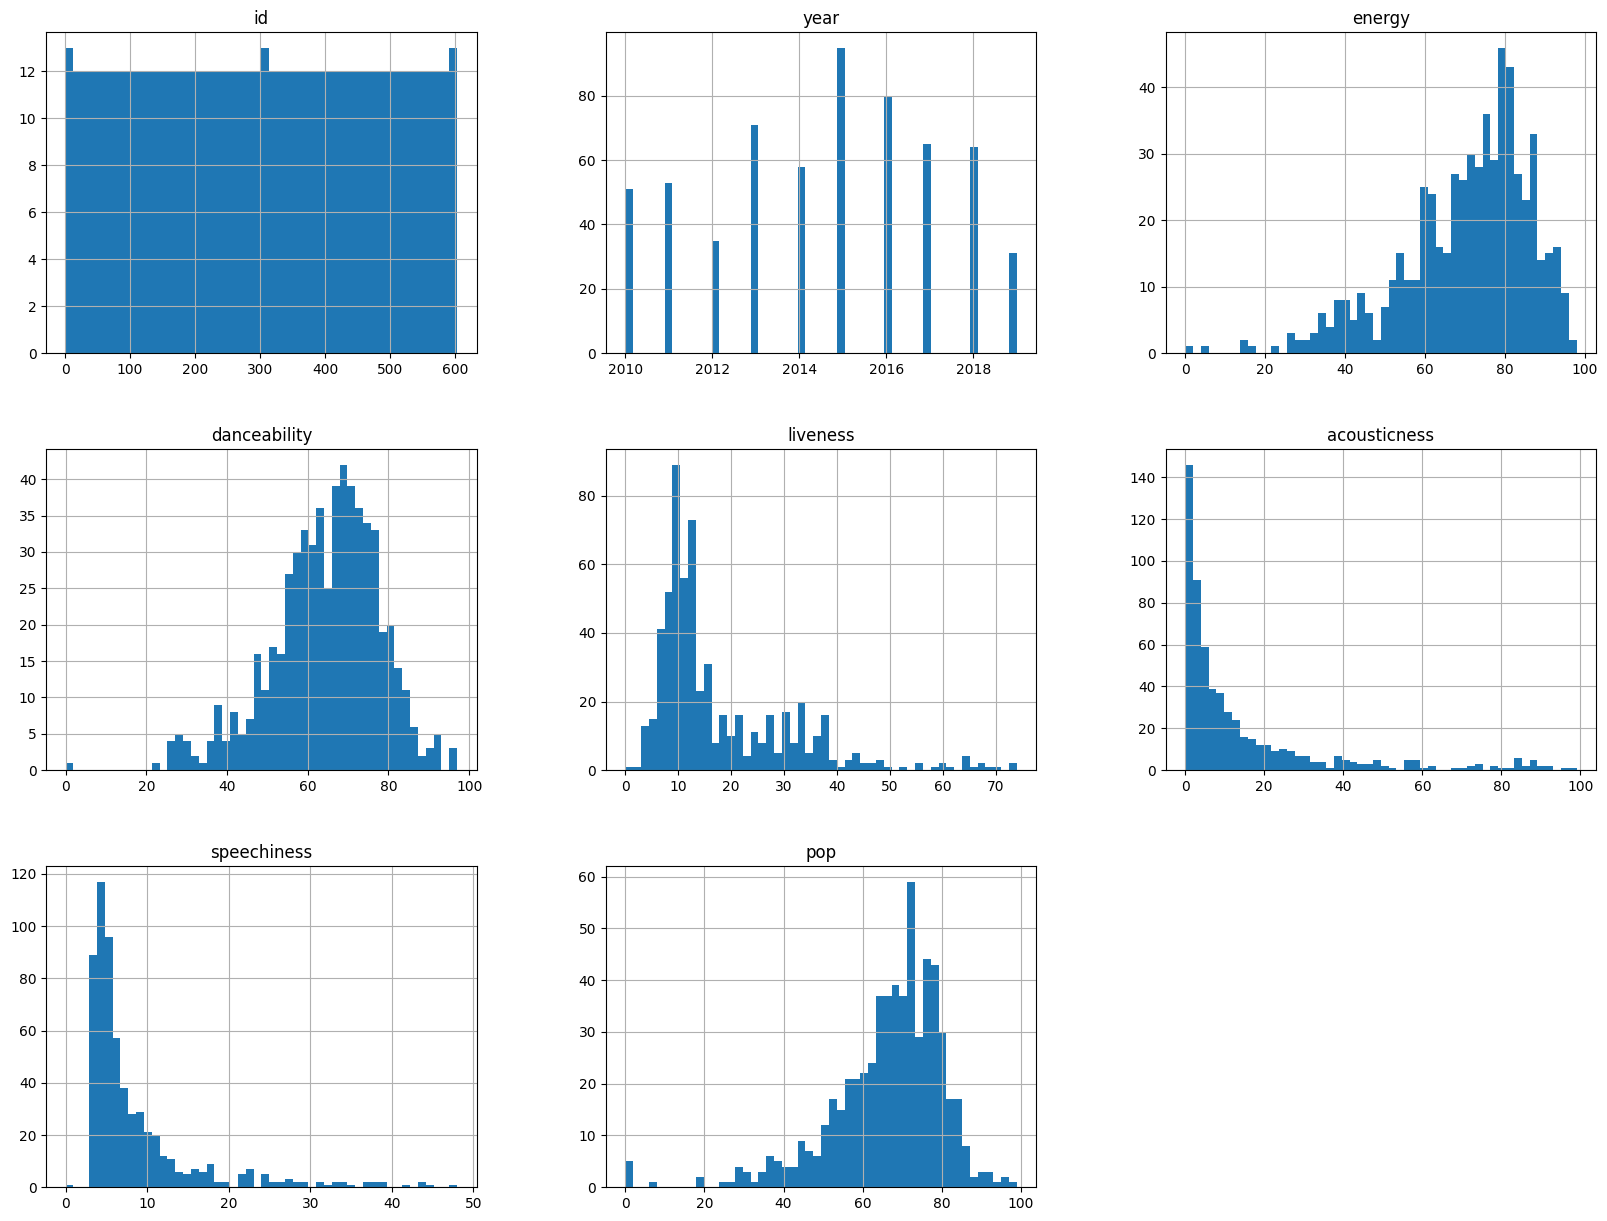

In [69]:
from matplotlib import pyplot as plt
data.hist(bins=50,figsize=(20,15))

In [70]:
# remove song names, artist and id before clustering
data_features = data.copy()
data_features = data_features.drop(['title','artist','id','year','top genre'],axis=1)
data_features

,energy,danceability,liveness,acousticness,speechiness,pop
0,89,67,8,19,4,83
1,93,75,52,24,23,82
2,84,76,29,10,14,80
3,92,70,8,0,4,79
4,84,64,9,2,4,78
...,...,...,...,...,...,...
598,66,61,20,1,3,75
599,79,75,7,21,12,75
600,76,53,9,7,34,70
601,79,60,42,1,7,69


In [71]:
#from sklearn.metrics import silhouette_score
#from sklearn.cluster import KMeans
#for n_clusters in range(2,15):
#    clusterer = KMeans (n_clusters=n_clusters)
#    preds = clusterer.fit_predict(data_features)
#    centers = clusterer.cluster_centers_

#    score = silhouette_score (data_features, preds, metric='euclidean')
#    print ("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

In [72]:
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_features)
    Sum_of_squared_distances.append(km.inertia_)

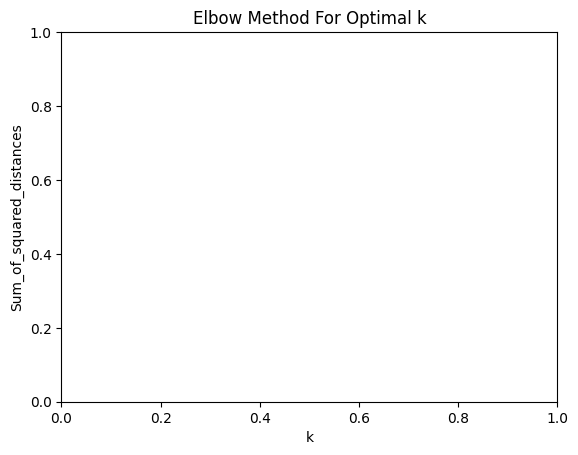

In [73]:
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()


In [74]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(data_features)

KMeans(n_clusters=6)

In [75]:
# PCA to reduce our data to 2 dimensions for visualisation
from sklearn.decomposition import PCA
y_kmeans = kmeans.predict(data_features)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_features)


/usr/local/lib/python3.11/dist-packages/seaborn/regression.py:598: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


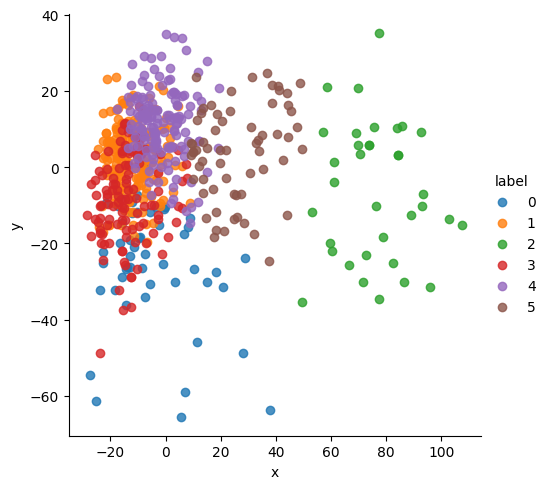

In [76]:
import seaborn as sns
pc = pd.DataFrame(principal_components)
pc['label'] = y_kmeans
pc.columns = ['x', 'y','label']

#plot data with seaborn
cluster = sns.lmplot(data=pc, x='x', y='y', hue='label',
                   fit_reg=False, legend=True, legend_out=True)


In [77]:
from sklearn.manifold import TSNE #T-Distributed Stochastic Neighbor Embedding
#T-SNE with two dimensions
tsne = TSNE(n_components=2, perplexity=50)

tsne_components = tsne.fit_transform(data_features)

/usr/local/lib/python3.11/dist-packages/seaborn/regression.py:598: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


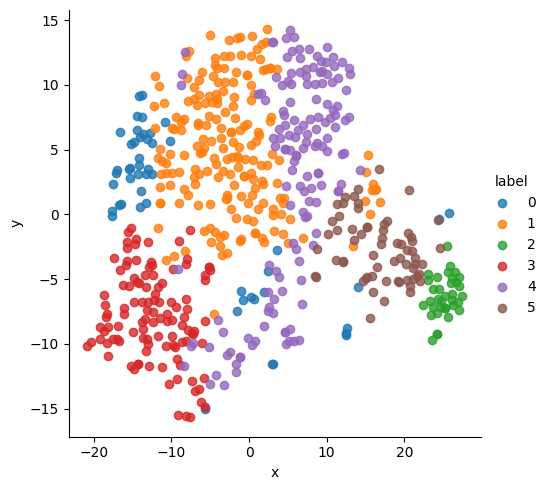

In [78]:
ts = pd.DataFrame(tsne_components)
ts['label'] = y_kmeans
ts.columns = ['x', 'y','label']

#plot data with seaborn
cluster = sns.lmplot(data=ts, x='x', y='y', hue='label', fit_reg=False, legend=True, legend_out=True)

In [79]:
pca.explained_variance_ratio_

array([0.43798608, 0.17454666])

In [80]:
# Dump components relations with features:
print (pd.DataFrame(pca.components_,columns=data_features.columns,index = ['PC-1','PC-2']))

        energy  danceability  liveness  acousticness  speechiness       pop
PC-1 -0.538315     -0.183234 -0.106366      0.814941    -0.015063  0.031170
PC-2 -0.150331      0.408807 -0.324991     -0.082877    -0.066276  0.832704


In [81]:
data['label'] = y_kmeans

# shuffle dataset
data = data.sample(frac=1) #frac=1 samples 100% of the data
data['label'].value_counts()

,count
label,
1,194
4,147
3,112
5,64
0,51
2,35


In [82]:
data[data['label'] == 0].tail(10) #returns the last N rows of filtered DataFrame

,id,title,artist,top genre,year,energy,danceability,liveness,acousticness,speechiness,pop,label
435,436,One Call Away (feat. Tyga) - Remix,Charlie Puth,dance pop,2016,69,75,13,26,4,41,0
426,427,Keeping Your Head Up,Birdy,neo mellow,2016,78,60,19,16,5,52,0
434,435,Invitation,Britney Spears,dance pop,2016,65,37,9,3,11,44,0
199,200,#Beautiful,Mariah Carey,dance pop,2013,76,68,31,29,4,51,0
137,138,It Will Rain,Bruno Mars,pop,2012,84,58,8,34,5,38,0
102,103,Firework,Katy Perry,dance pop,2011,83,64,11,14,5,25,0
506,507,Kissing Strangers - Remix,DNCE,dance pop,2017,77,76,8,8,5,43,0
571,572,Tell Me You Love Me - NOTD Remix,Demi Lovato,dance pop,2018,77,58,9,5,8,44,0
204,205,Overdose,Ciara,dance pop,2013,70,77,6,1,3,43,0
428,429,Make Me Like You,Gwen Stefani,dance pop,2016,71,74,13,4,5,50,0


In [83]:
data['top genre'][data['label'] == 0].value_counts()

,count
top genre,
dance pop,38
pop,2
atl hip hop,1
canadian latin,1
british soul,1
big room,1
latin,1
alaska indie,1
permanent wave,1


In [84]:
data[data['label'] == 1].tail(10)

,id,title,artist,top genre,year,energy,danceability,liveness,acousticness,speechiness,pop,label
390,391,Light It Up (feat. Nyla & Fuse ODG) [Remix],Major Lazer,dance pop,2016,88,75,23,4,7,73,1
225,226,Latch,Disclosure,house,2014,73,50,9,2,17,72,1
54,55,Just the Way You Are,Bruno Mars,pop,2011,84,64,9,2,4,78,1
504,505,Water Under the Bridge,Adele,british soul,2017,84,60,11,2,7,49,1
248,249,Shot Me Down (feat. Skylar Grey) - Radio Edit,David Guetta,dance pop,2014,77,35,12,6,5,61,1
75,76,Sexy And I Know It,LMFAO,dance pop,2011,86,71,19,10,32,67,1
319,320,The Feeling,Justin Bieber,canadian pop,2015,81,53,10,8,6,67,1
557,558,Kissing Strangers,DNCE,dance pop,2018,74,77,9,5,4,66,1
599,600,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,pop,2019,79,75,7,21,12,75,1
212,213,Summer,Calvin Harris,dance pop,2014,86,60,14,2,3,80,1


In [85]:
data['top genre'][data['label'] == 0].value_counts()

,count
top genre,
dance pop,38
pop,2
atl hip hop,1
canadian latin,1
british soul,1
big room,1
latin,1
alaska indie,1
permanent wave,1


In [86]:
data[data['label'] == 2].tail(10)

,id,title,artist,top genre,year,energy,danceability,liveness,acousticness,speechiness,pop,label
186,187,Clown,Emeli Sandé,dance pop,2013,23,45,11,92,4,60,2
284,285,Night Changes,One Direction,boy band,2015,52,67,12,86,4,77,2
96,97,Turning Page,Sleeping At Last,acoustic pop,2011,38,30,11,91,3,46,2
8,9,Empire State of Mind (Part II) Broken Down,Alicia Keys,hip pop,2010,37,48,12,74,3,76,2
572,573,Memories,Maroon 5,pop,2019,32,76,8,84,5,99,2
359,360,Run Run Run,Kelly Clarkson,dance pop,2015,37,28,11,45,4,36,2
36,37,Bound To You - Burlesque Original Motion Pictu...,Christina Aguilera,dance pop,2010,41,29,13,83,3,61,2
411,412,Don't Be A Fool,Shawn Mendes,canadian pop,2016,34,47,10,60,4,65,2
271,272,Love Yourself,Justin Bieber,canadian pop,2015,38,61,28,84,44,83,2
330,331,Mark My Words,Justin Bieber,canadian pop,2015,26,38,17,88,3,63,2


In [87]:
data['top genre'][data['label'] == 2].value_counts()

,count
top genre,
dance pop,8
neo mellow,5
canadian pop,5
pop,4
british soul,3
art pop,2
detroit hip hop,1
australian dance,1
folk-pop,1


In [88]:
data[data['label'] == 3].tail(10)

,id,title,artist,top genre,year,energy,danceability,liveness,acousticness,speechiness,pop,label
222,223,Pompeii,Bastille,metropopolis,2014,72,68,27,8,4,73,3
581,582,Good as Hell (feat. Ariana Grande) - Remix,Lizzo,escape room,2019,89,67,74,30,6,90,3
245,246,"Let It Go - From ""Frozen / Single Version",Demi Lovato,dance pop,2014,66,50,27,3,4,63,3
419,420,Desire,Years & Years,dance pop,2016,78,71,30,30,6,58,3
494,495,Touch (feat. Kid Ink),Little Mix,dance pop,2017,75,64,49,4,11,59,3
118,119,Good Time,Owl City,pop,2012,87,56,37,2,14,73,3
53,54,Give Me Everything,Pitbull,dance pop,2011,94,67,30,19,16,79,3
15,16,OMG (feat. will.i.am),Usher,atl hip hop,2010,75,78,36,20,3,72,3
48,49,Castle Walls (feat. Christina Aguilera),T.I.,atl hip hop,2010,86,45,26,7,39,49,3
38,39,Rock That Body,The Black Eyed Peas,dance pop,2010,91,72,43,2,10,59,3


In [89]:
data['top genre'][data['label'] == 3].value_counts()

,count
top genre,
dance pop,64
pop,11
canadian pop,6
atl hip hop,3
barbadian pop,3
boy band,3
australian pop,3
electropop,3
indie pop,2


In [90]:
data[data['label'] == 4].tail(10)

,id,title,artist,top genre,year,energy,danceability,liveness,acousticness,speechiness,pop,label
455,456,Something Just Like This,The Chainsmokers,electropop,2017,65,61,17,3,4,78,4
566,567,Ferrari,Bebe Rexha,dance pop,2018,48,58,10,2,3,57,4
513,514,no tears left to cry,Ariana Grande,dance pop,2018,71,70,29,4,6,84,4
520,521,Love On The Brain,Rihanna,barbadian pop,2018,64,51,8,7,5,82,4
583,584,Only Human,Jonas Brothers,boy band,2019,50,80,6,11,7,87,4
588,589,Talk (feat. Disclosure),Khalid,alternative r&b,2019,40,90,6,5,13,84,4
116,117,Starships,Nicki Minaj,dance pop,2012,72,75,25,14,8,73,4
464,465,Paris,The Chainsmokers,electropop,2017,64,65,9,2,3,76,4
281,282,Want to Want Me,Jason Derulo,dance pop,2015,68,78,11,1,6,77,4
41,42,Doesn't Mean Anything,Alicia Keys,hip pop,2010,41,71,10,4,3,57,4


In [91]:
data['top genre'][data['label'] == 4].value_counts()

,count
top genre,
dance pop,79
pop,18
canadian pop,8
electropop,6
edm,4
barbadian pop,4
canadian contemporary r&b,3
canadian hip hop,2
big room,2


In [92]:
data[data['label'] == 5].tail(10)

,id,title,artist,top genre,year,energy,danceability,liveness,acousticness,speechiness,pop,label
269,270,I'm Not The Only One,Sam Smith,pop,2015,49,68,8,53,4,84,5
279,280,What Do You Mean?,Justin Bieber,canadian pop,2015,57,85,8,59,10,79,5
339,340,See You Again (feat. Charlie Puth),Wiz Khalifa,hip hop,2015,48,69,6,37,8,56,5
452,453,Stay,Zedd,complextro,2017,62,69,12,25,6,80,5
427,428,True Colors,Zedd,complextro,2016,79,57,10,40,4,51,5
64,65,Marry You,Bruno Mars,pop,2011,83,62,10,33,4,73,5
420,421,When We Were Young,Adele,british soul,2016,59,38,9,35,5,58,5
278,279,"Earned It (Fifty Shades Of Grey) - From The ""F...",The Weeknd,canadian contemporary r&b,2015,38,66,10,39,3,79,5
471,472,Love,Lana Del Rey,art pop,2017,37,53,11,49,3,72,5
545,546,Let Me,ZAYN,dance pop,2018,57,46,10,24,5,72,5


In [93]:
data['top genre'][data['label'] == 5].value_counts()

,count
top genre,
dance pop,28
pop,11
canadian pop,3
canadian contemporary r&b,3
complextro,2
electropop,2
british soul,2
art pop,2
danish pop,1


In [94]:
data[data['label']==0].mean(numeric_only=True)

,0
id,299.490196
year,2014.156863
energy,71.372549
danceability,67.490196
liveness,16.431373
acousticness,10.745098
speechiness,9.411765
pop,34.372549
label,0.000000


In [95]:
data[data['label']==1].mean(numeric_only=True)

,0
id,276.438144
year,2014.221649
energy,81.525773
danceability,64.046392
liveness,11.118557
acousticness,6.242268
speechiness,8.113402
pop,68.572165
label,1.000000


In [96]:
data[data['label']==2].mean(numeric_only=True)

,0
id,324.542857
year,2014.885714
energy,34.542857
danceability,48.057143
liveness,14.371429
acousticness,79.857143
speechiness,6.485714
pop,65.657143
label,2.000000


In [97]:
data[data['label']==3].mean(numeric_only=True)

,0
id,244.535714
year,2013.723214
energy,80.589286
danceability,62.866071
liveness,38.723214
acousticness,6.258929
speechiness,9.839286
pop,66.285714
label,3.000000


In [98]:
data[data['label']==4].mean(numeric_only=True)

,0
id,356.877551
year,2015.496599
energy,60.496599
danceability,70.027211
liveness,13.823129
acousticness,6.285714
speechiness,7.931973
pop,73.108844
label,4.000000


In [99]:
data[data['label']==5].mean(numeric_only=True)

,0
id,343.671875
year,2015.343750
energy,61.406250
danceability,61.515625
liveness,13.296875
acousticness,38.437500
speechiness,7.671875
pop,71.671875
label,5.000000


array([[<Axes: title={'center': 'id'}>, <Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'energy'}>],
       [<Axes: title={'center': 'danceability'}>,
        <Axes: title={'center': 'liveness'}>,
        <Axes: title={'center': 'acousticness'}>],
       [<Axes: title={'center': 'speechiness'}>,
        <Axes: title={'center': 'pop'}>,
        <Axes: title={'center': 'label'}>]], dtype=object)

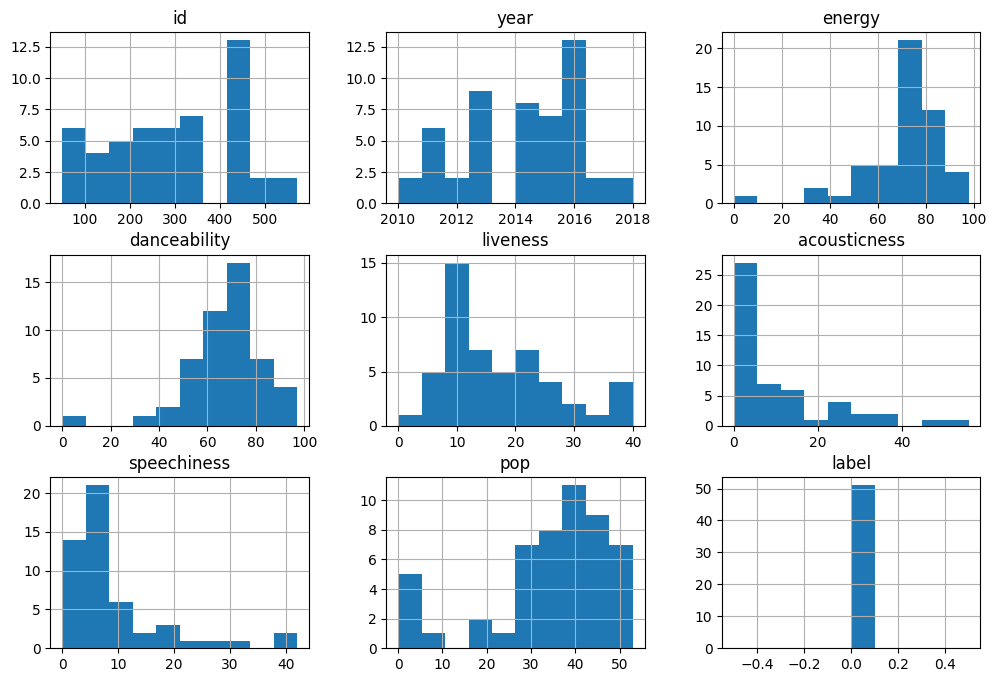

In [100]:
data[data['label']==0].hist(figsize=(12,8))

In [101]:
input1 = "love me"  #input("Enter song1: ")
input2 = "baby"     #input("Enter song2: ")
input3 = "like it"  #input("Enter song3: ")

In [102]:
# Function to find the cluster of a song
def get_song_cluster(song_title, dataframe, kmeans_model, feature_data):
    song_row = dataframe[dataframe['title'].str.contains(song_title, case=False, na=False)]
    if not song_row.empty:
        # Use the index of the original dataframe to select the corresponding feature row
        song_features = feature_data.loc[song_row.index]
        cluster = kmeans_model.predict(song_features)
        return cluster[0]
    return None

# Get clusters for input songs
input_songs = [input1, input2, input3]
input_clusters = []
for song_title in input_songs:
    cluster = get_song_cluster(song_title, data, kmeans, data_features)
    if cluster is not None:
        input_clusters.append(cluster)
        print(f"'{song_title}' is in cluster {cluster}")
    else:
        print(f"'{song_title}' not found in the dataset.")

# Recommend songs from the identified clusters
recommended_songs = pd.DataFrame()
if input_clusters:
    # Get unique clusters from input songs
    unique_clusters = list(set(input_clusters))
    print(f"\nRecommending songs from cluster(s): {unique_clusters}")
    for cluster_label in unique_clusters:
        cluster_songs = data[data['label'] == cluster_label]
        # Exclude the input songs from the recommendations
        recommended_songs = pd.concat([recommended_songs, cluster_songs[~cluster_songs['title'].str.contains('|'.join(input_songs), case=False, na=False)]])

# Display recommended songs
if not recommended_songs.empty:
    print("\nRecommended Songs:")
    # Display a random sample of recommended songs with selected columns
    display(recommended_songs.sample(min(10, len(recommended_songs)))[['title', 'artist', 'top genre', 'year']])
else:
    print("\nNo recommendations found for the given songs.")

'love me' is in cluster 4
'baby' is in cluster 4
'like it' is in cluster 3

Recommending songs from cluster(s): [np.int32(3), np.int32(4)]

Recommended Songs:


,title,artist,top genre,year
453,It Ain't Me (with Selena Gomez),Kygo,edm,2017
145,We Can't Stop,Miley Cyrus,dance pop,2013
157,Everybody Talks,Neon Trees,indie pop,2013
353,Yesterday (feat. Bebe Rexha),David Guetta,dance pop,2015
181,Rock N Roll,Avril Lavigne,canadian pop,2013
328,Booty,Jennifer Lopez,dance pop,2015
185,Made In The USA,Demi Lovato,dance pop,2013
32,Blah Blah Blah (feat. 3OH!3),Kesha,dance pop,2010
198,Pom Poms,Jonas Brothers,boy band,2013
306,Only Love Can Hurt Like This,Paloma Faith,british soul,2015
